In [1]:
import pandas as pd 
from datetime import timedelta
import matplotlib.pyplot as plt 

In [2]:
logins=pd.read_json("C:/Users/turki/Downloads/1481053515_ultimate_challenge (3)/ultimate_challenge/logins.json")

In [3]:
logins.sample(10)

,login_time
50954,1970-03-06 17:40:21
80853,1970-04-02 02:30:32
73218,1970-03-26 01:49:45
21846,1970-02-01 15:31:59
23948,1970-02-05 12:42:10
50157,1970-03-05 21:51:42
45792,1970-02-28 22:35:16
40787,1970-02-23 08:30:13
45217,1970-02-28 11:01:54
6419,1970-01-10 19:22:12


In [97]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [98]:
logins.isnull().sum()

login_time    0
dtype: int64

In [4]:
resampled=logins.set_index(logins['login_time']).resample('15T').count()


In [80]:
resampled.shape

(9788, 1)

In [81]:
resampled.isnull().sum()

login_time    0
dtype: int64

In [5]:
resampled.index.name='date'

In [6]:
resampled.head()

,login_time
date,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [111]:
resampled.head()

,login_time
date,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [7]:
import datetime as dt 

In [8]:
resampled['month']=pd.DatetimeIndex(resampled.index).month

In [62]:
resampled['day']=pd.DatetimeIndex(resampled.index).day_name()

In [10]:
resampled['time']=pd.DatetimeIndex(resampled.index).hour

In [63]:
resampled.sample(10)

,login_time,month,day,time
date,,,,
1970-02-24 19:30:00,2,2,Tuesday,19
1970-03-21 16:15:00,12,3,Saturday,16
1970-02-23 09:30:00,3,2,Monday,9
1970-02-16 07:00:00,1,2,Monday,7
1970-03-01 06:45:00,4,3,Sunday,6
1970-02-23 13:15:00,4,2,Monday,13
1970-03-28 09:30:00,2,3,Saturday,9
1970-03-15 19:30:00,11,3,Sunday,19
1970-03-24 00:30:00,13,3,Tuesday,0


In [12]:
resampled.columns

Index(['login_time', 'month', 'day', 'time'], dtype='object')

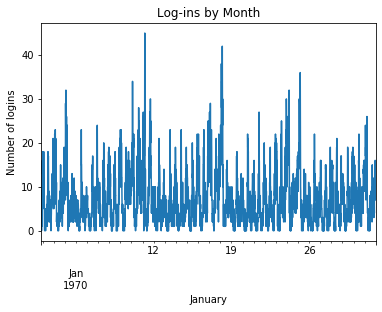

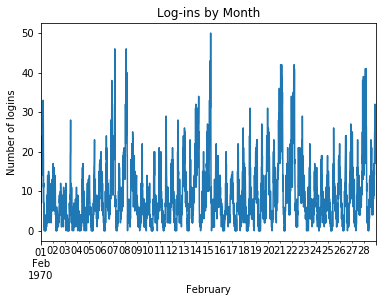

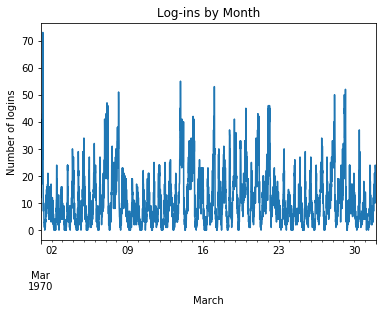

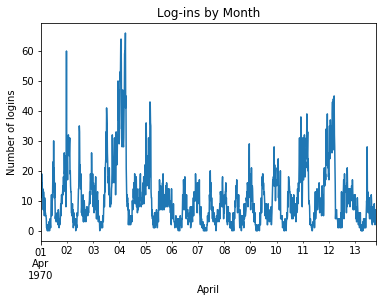

In [108]:
months=['January','February','March','April']
for i in range(1,5):
    df1=resampled[resampled['month']==i]['login_time'].plot()
    plt.title('Log-ins by Month')
    plt.xlabel(months[i-1])
    plt.ylabel('Number of logins')
    plt.show()

In [57]:
import seaborn as sns 

In [76]:
by_day=resampled.groupby(['day','month'])['login_time'].agg('sum').sort_values(ascending=False).reset_index()

In [77]:
by_day.sample(10)

,day,month,login_time
5,Saturday,1,4642
24,Monday,1,1926
7,Friday,2,4092
0,Sunday,3,7267
18,Friday,4,2513
10,Wednesday,3,3657
27,Tuesday,4,590
26,Monday,4,1010
3,Sunday,2,4704
2,Saturday,2,5149


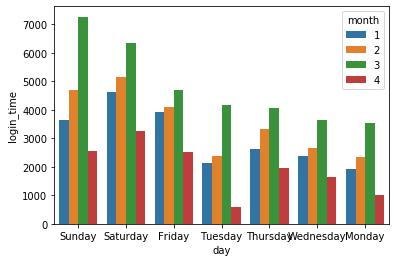

In [86]:

sns.barplot('day', 'login_time', hue='month', data=by_day)
plt.show()

Based on the graph above, we see that number of logins shows significant increase at weekends for all the months.Amongst the months,  March has the max number of logins followed by February. February and January show very similiar patterns in terms of the number of logins for the same days. 

In [88]:
by_hour=resampled.groupby(['time','day'])['login_time'].agg('sum').sort_values(ascending=False).reset_index()

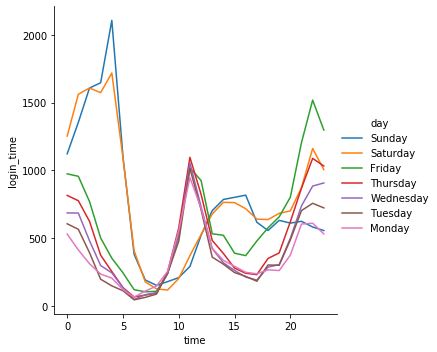

In [94]:
sns.relplot('time','login_time', data=by_hour, hue='day',kind='line')

We want to see whether there is any hourly pattern for during each day. The data is grouped by month and day.Based on the graph above, we see that number of logins are significantly higher between midnight and 5am at weekends. It starts dropping as of 5 am at weekends. Weekdays show the opposite pattern. We see that between 5am and 10 am there is a high demand on weekdays. Then the demand decreases around 11am till 3pm. we observe the opposite pattern at weekends between the same hours.  it seems that the demand increases again around 5pm till 9 pm on weekdays. 

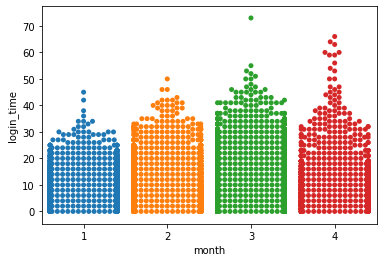

In [105]:
sns.swarmplot('month','login_time' ,data=resampled)

Overall, The demand shows steady increase from January to April. 